In [30]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import numpy as np

In [29]:
pip install missingno

In [31]:
import seaborn as sns

## missingno 패키지

In [7]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [8]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [9]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

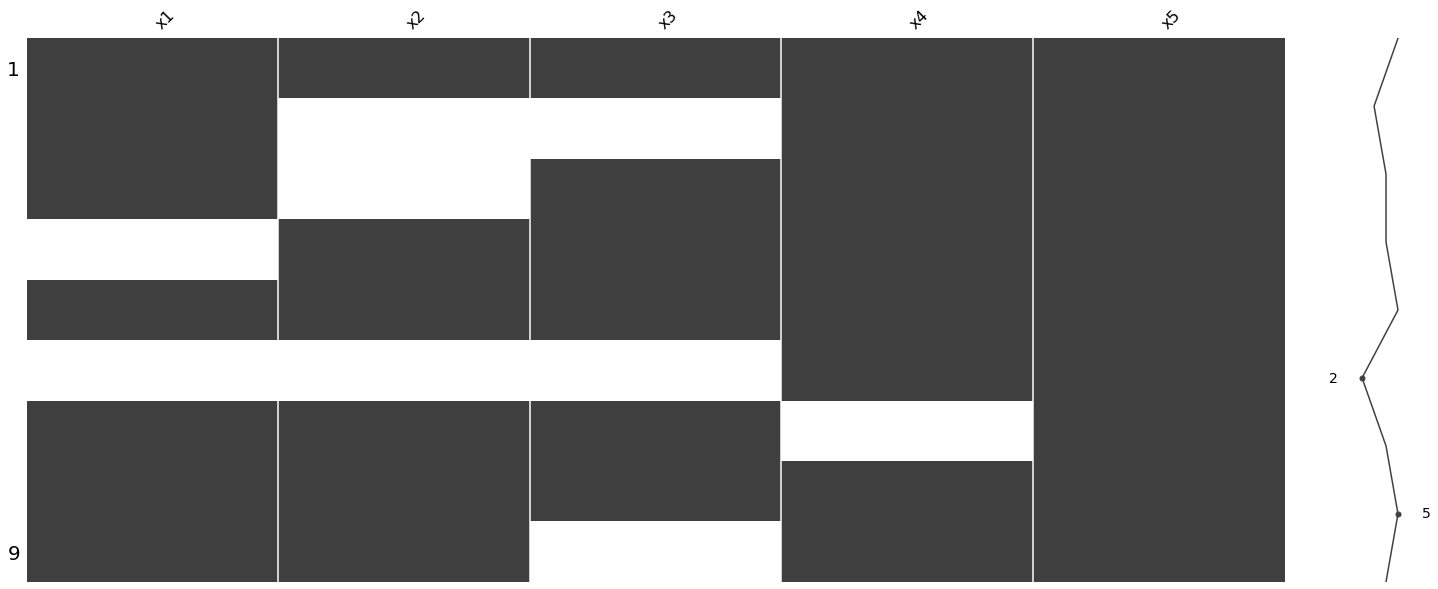

In [16]:
import missingno as msno

msno.matrix(df)
plt.show()

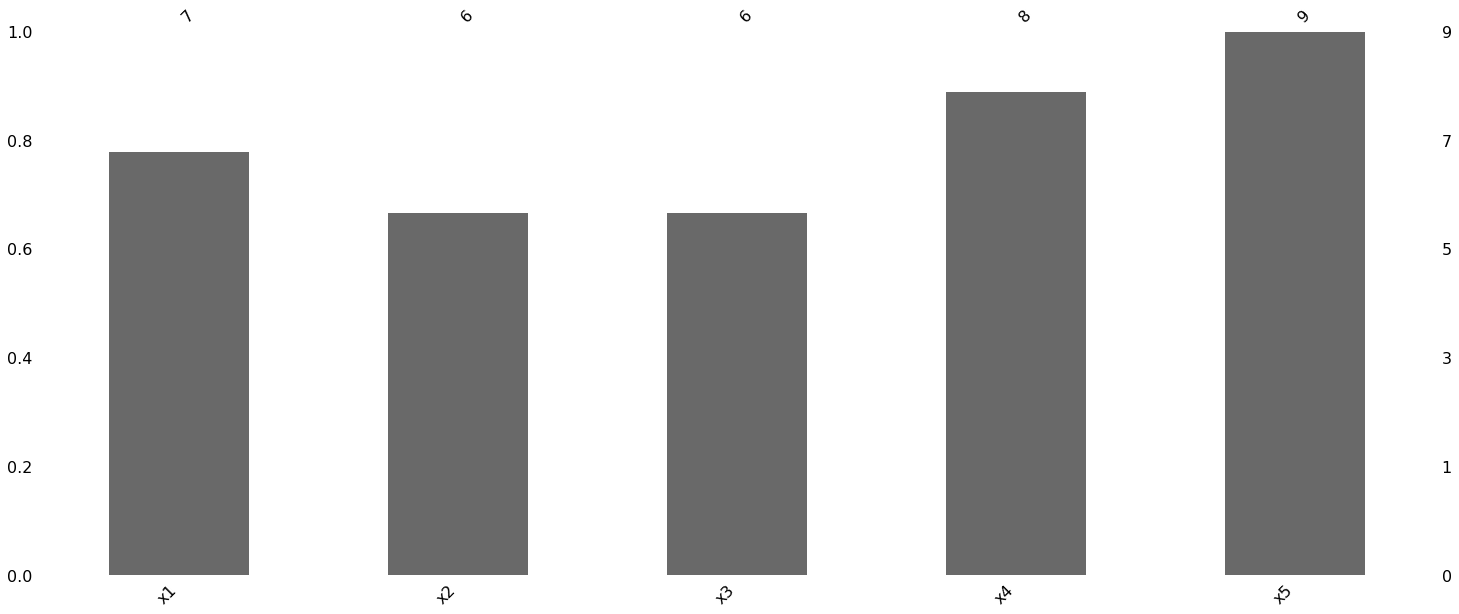

In [17]:
msno.bar(df)
plt.show()

In [19]:
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


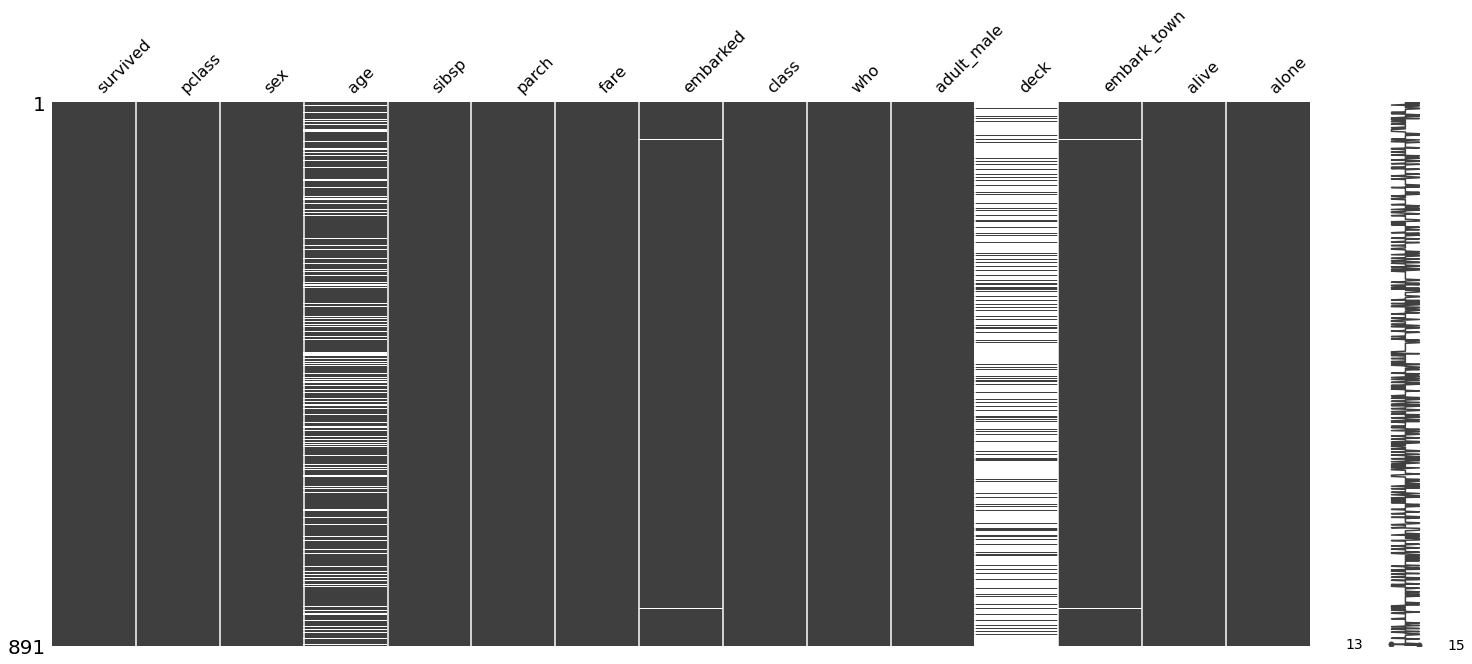

In [20]:
msno.matrix(titanic)
plt.show()

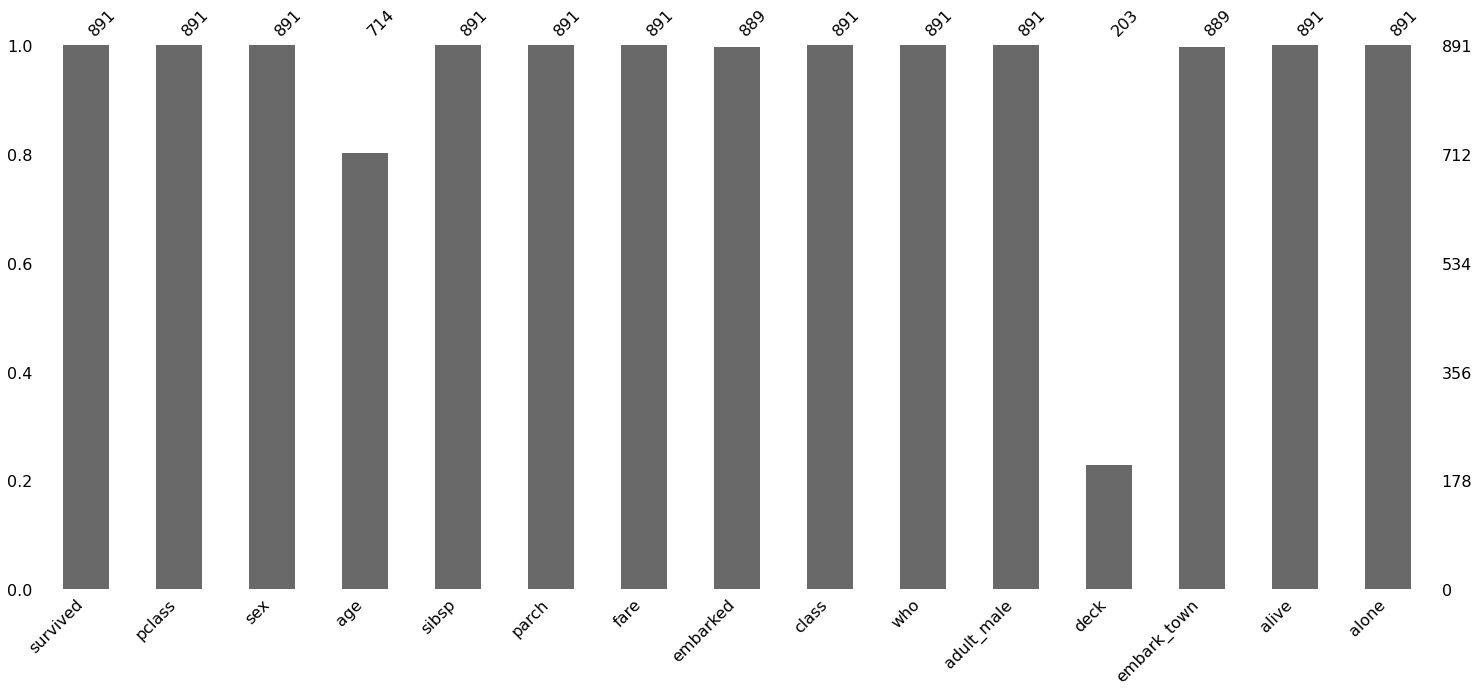

In [21]:
msno.bar(titanic)
plt.show()

### dropna( ) - 결측데이터 행이나 열 지우기

In [22]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [23]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [24]:
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


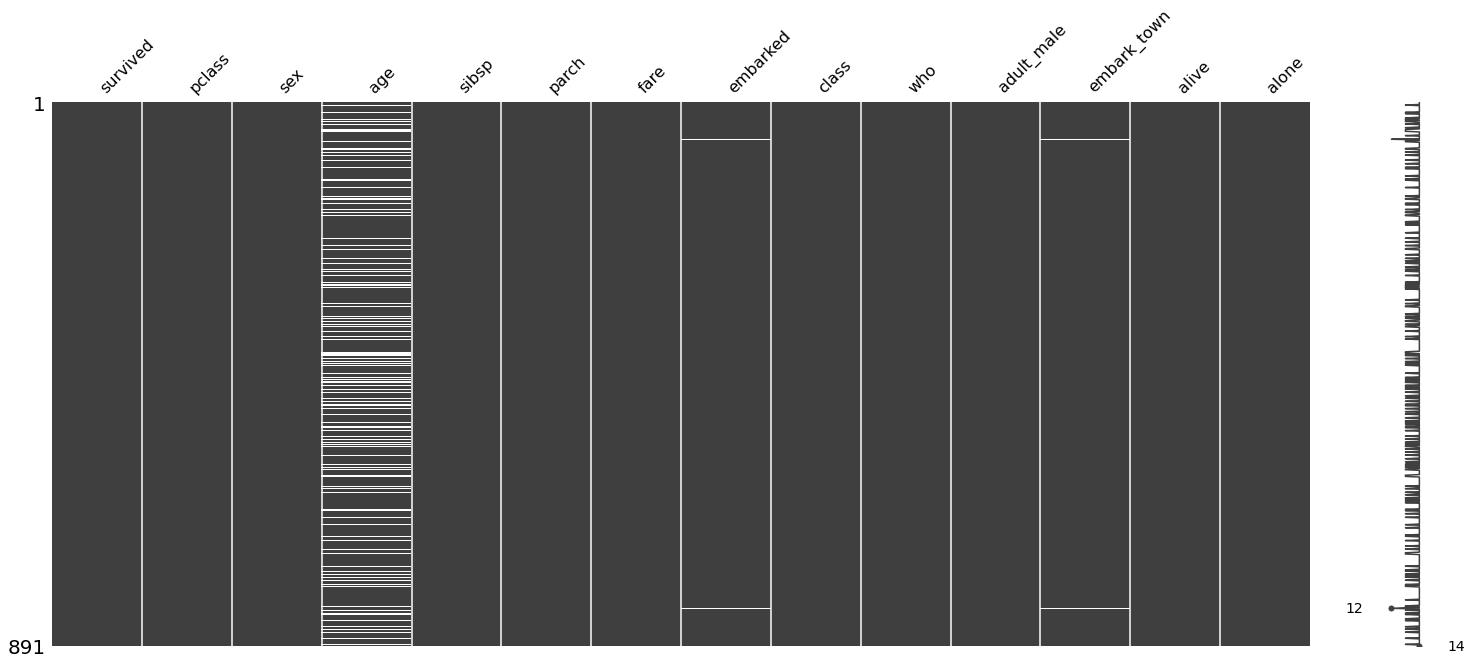

In [25]:
#데이터가 절반 이상이 없는 열을 삭제

titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
msno.matrix(titanic)
plt.show()

In [37]:
import sklearn as sk
import statsmodels.api as sm

In [42]:
import matplotlib as mpl
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

C:\Users\82107\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


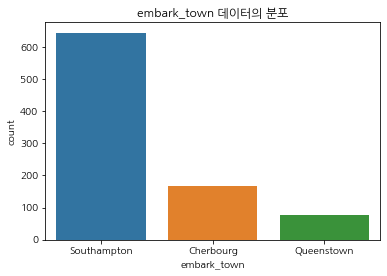

In [43]:
sns.countplot(titanic.embark_town)
plt.title("embark_town 데이터의 분포")
plt.show()

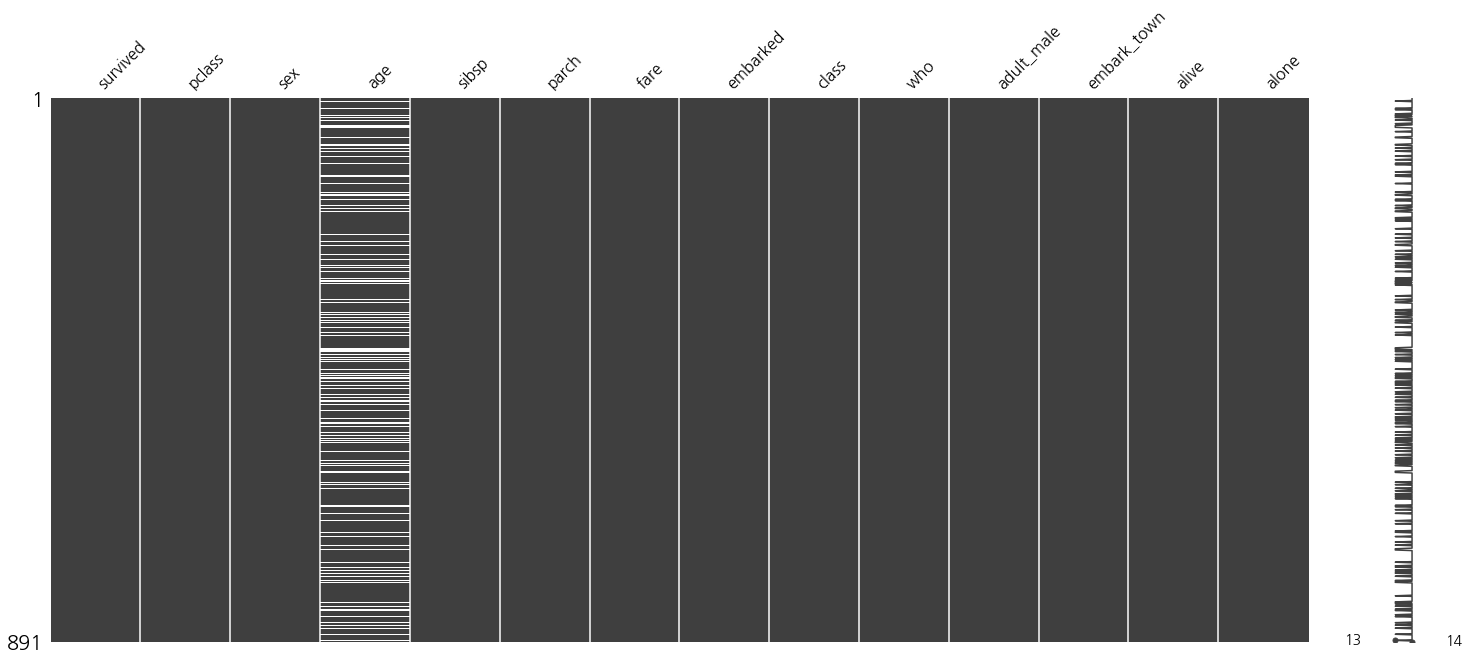

In [44]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

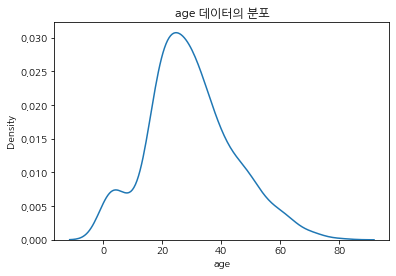

In [45]:
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()

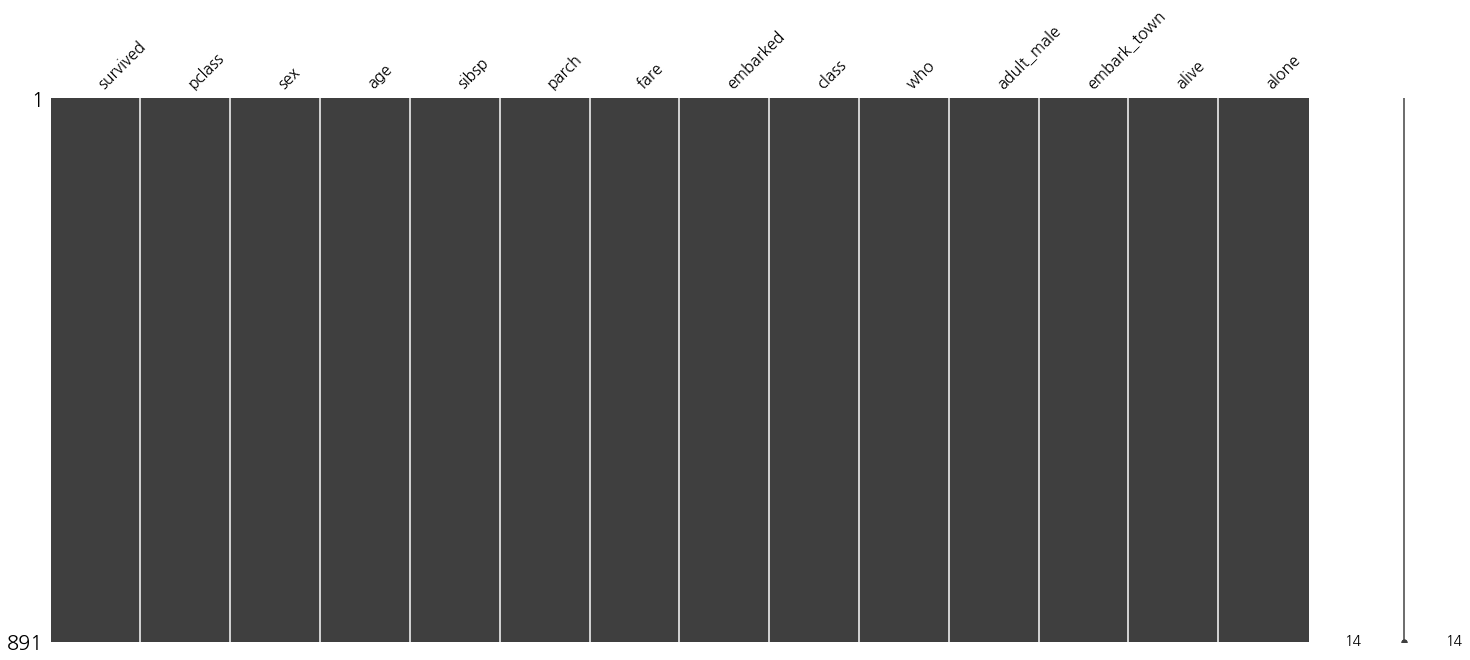

In [46]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_embark_town.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()